Implementing Monte Carlo Simulation in Python and Determining the expected stock price of RELIANCE through it


In [68]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

reliance = pdr.get_data_yahoo('RELIANCE.NS', start='2013-04-14')

print(reliance)



[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-04-15   382.895538   396.219238   382.895538   393.074066   366.154022   
2013-04-16   394.758087   401.197052   389.012543   398.695770   371.390717   
2013-04-17   399.141541   400.998932   380.988617   383.217468   356.972443   
2013-04-18   384.604340   388.913483   382.697418   387.130402   360.617401   
2013-04-22   389.309723   393.618896   385.495880   391.167114   364.377594   
...                 ...          ...          ...          ...          ...   
2023-04-06  2318.149902  2354.000000  2318.149902  2341.449951  2341.449951   
2023-04-10  2350.000000  2350.399902  2321.550049  2324.850098  2324.850098   
2023-04-11  2334.000000  2341.000000  2324.050049  2336.350098  2336.350098   
2023-04-12  2336.350098  2367.800049  2330.050049  2346.649902

In [61]:
time_elapsed = (reliance.index[-1] - reliance.index[0]).days

time_elapsed



3650

In [70]:

total_growth = (reliance['Adj Close'][-1] / reliance['Adj Close'][1])

number_of_years = time_elapsed / 365.0

cagr = total_growth ** (1/number_of_years) - 1


std_dev = reliance['Adj Close'].pct_change().std()



number_of_trading_days = 252
std_dev = std_dev * math.sqrt(number_of_trading_days)


print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("std_dev (standard deviation of return : ", str(round(std_dev,4)))


cagr (mean returns) :  0.2029
std_dev (standard deviation of return :  0.2861


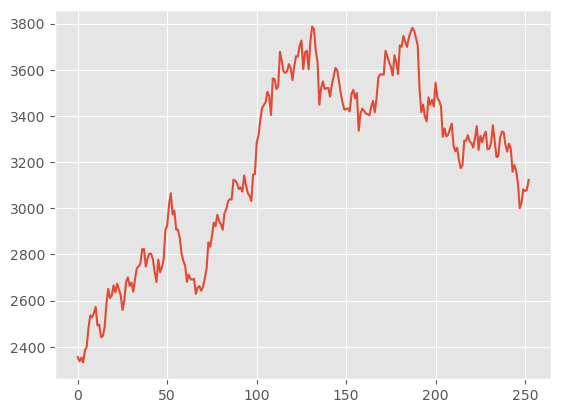

In [60]:

daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days),number_of_trading_days)+1



price_series = [reliance['Adj Close'][-1]]

for j in daily_return_percentages:
    price_series.append(price_series[-1] * j)

plt.plot(price_series)
plt.show()

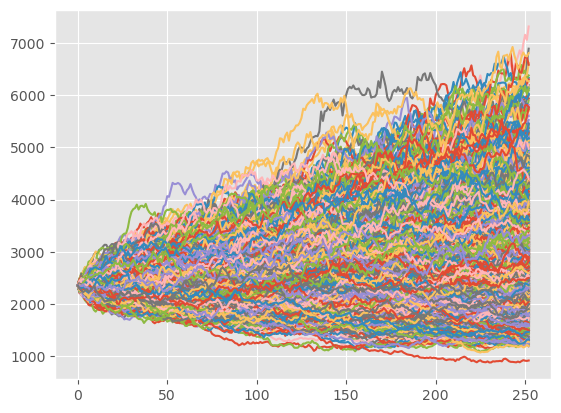

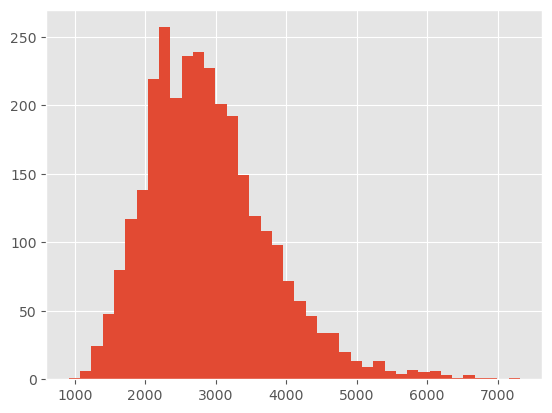

In [63]:

number_of_trials = 3000

closing_prices = []

for i in range(number_of_trials):
   
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [reliance['Adj Close'][-1]]

    for j in daily_return_percentages:
        
        price_series.append(price_series[-1] * j)

    closing_prices.append(price_series[-1])

   
    plt.plot(price_series)

plt.show()

plt.hist(closing_prices,bins=40)

plt.show()


EXPECTED STOCK PRICE OF RELIANCE

In [64]:
mean_end_price = round(np.mean(closing_prices),2)
print("Expected price: ", str(mean_end_price))

Expected price:  2900.91


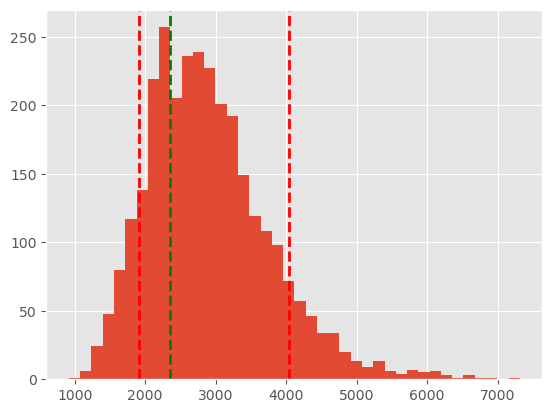

In [69]:

top_ten = np.percentile(closing_prices,100-10)


bottom_ten = np.percentile(closing_prices,10);


plt.hist(closing_prices,bins=40)

plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)

plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)

plt.axvline(reliance['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)

plt.show()
